<a href="https://colab.research.google.com/github/THEABHASHARMA/EDAHypothesisTesting/blob/main/shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA analysis on Shopping Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
df = pd.read_csv("shopping.csv")

#1. Data Preprocessing

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape

(12330, 18)

In [5]:
#Inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Check for missing values
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [7]:
df.describe(include = "all")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [8]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(12205, 18)

In [9]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8312,4,84.750000,0,0.000000,46,962.901190,0.004444,0.012130,0.000000,0.0,Dec,1,1,6,2,Returning_Visitor,False,False
1930,0,0.000000,0,0.000000,7,221.714286,0.028571,0.060714,0.000000,0.0,Mar,3,3,1,3,Returning_Visitor,False,False
11551,6,191.000000,1,26.500000,37,1874.841667,0.009302,0.010078,0.000000,0.0,Nov,2,2,4,3,Returning_Visitor,False,False
8331,0,0.000000,0,0.000000,19,593.750000,0.000000,0.014035,0.000000,0.0,Nov,2,2,1,2,New_Visitor,False,False
2140,9,175.933333,0,0.000000,28,717.219048,0.005882,0.017059,0.000000,1.0,May,2,2,5,4,Returning_Visitor,True,False
6156,4,234.300000,0,0.000000,2,11.100000,0.000000,0.040000,0.000000,0.0,Oct,1,1,8,5,New_Visitor,True,False
5517,3,397.700000,4,1093.300000,66,4152.763100,0.014980,0.017562,6.282905,0.0,Sep,3,2,8,4,Returning_Visitor,True,False
5022,1,14.000000,1,19.000000,49,1527.583333,0.007843,0.017647,8.926824,0.0,May,2,2,9,3,Returning_Visitor,False,True
7741,0,0.000000,0,0.000000,27,228.900000,0.014815,0.037037,0.000000,0.0,Aug,4,1,1,1,Returning_Visitor,False,False
11693,13,225.538636,8,368.154762,111,3874.240873,0.006494,0.021731,6.245398,0.0,Nov,2,2,9,2,Returning_Visitor,False,False


In [10]:
# Feature Engineering: Create a binary feature for visiting all three categories
df['Visited_All_Categories'] = np.where((df['Administrative'] > 0) &
                                                 (df['Informational'] > 0) &
                                                 (df['ProductRelated'] > 0), 1, 0)



#2. Univariate Analysis


In [11]:
cat_cols = df.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Month', 'VisitorType']

In [12]:
num_cols = df.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
df[num_cols]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Visited_All_Categories
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,False,False,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,False,False,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,False,False,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,True,False,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,True,False,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,True,False,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,False,False,0


#**Plot** histograms and box plots to visualize distributions and outliers


In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Administrative'].quantile(0.25)
Q3 = df['Administrative'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['Administrative'] < lower_bound) | (df['Administrative'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers", outlier_count)

Count the number of outliers 404


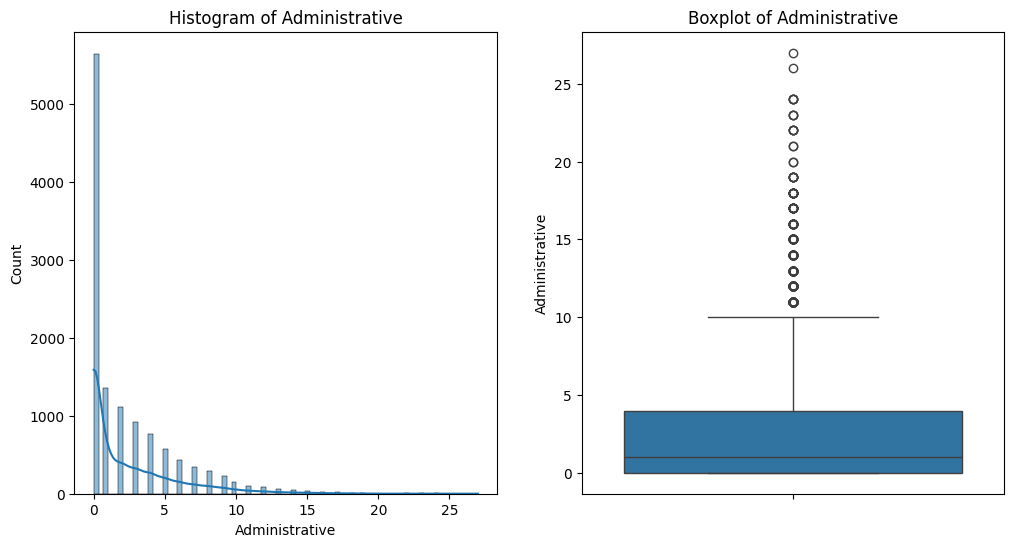

In [14]:


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x=df['Administrative'], kde=True)
plt.title('Histogram of Administrative')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Administrative'])
plt.title('Boxplot of Administrative')

plt.show()

#Insights:

1.Histogram:

The histogram shows that the majority of the "Administrative" values are concentrated at the lower end, near 0. This suggests that most observations have low "Administrative" values.
The distribution is highly right-skewed, with a long tail extending towards higher values. This indicates that while most values are low, there are some observations with much higher values.

2.Boxplot:

The boxplot also reflects the skewness seen in the histogram, with a large number of outliers on the higher end. These outliers are represented by the individual points above the whisker.
The interquartile range (IQR) is relatively small, meaning that the middle 50% of the data is concentrated within a narrow range.
The median value is close to the lower quartile, further confirming the skewness of the distribution.
Overall, the variable "Administrative" has a distribution with many small values and a few very high outliers, which significantly affects the overall shape of the data distribution.

In [17]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Administrative_Duration'].quantile(0.25)
Q3 = df['Administrative_Duration'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['Administrative_Duration'] < lower_bound) | (df['Administrative_Duration'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers",outlier_count)

Count the number of outliers 1149


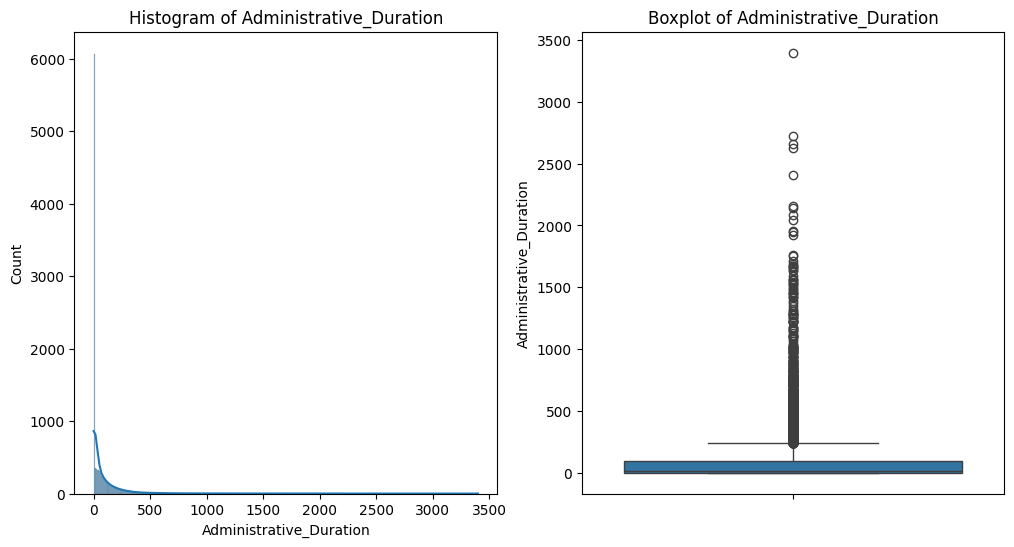

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x=df['Administrative_Duration'], kde=True)
plt.title('Histogram of Administrative_Duration')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Administrative_Duration'])
plt.title('Boxplot of Administrative_Duration')

plt.show()

In [19]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Informational'].quantile(0.25)
Q3 = df['Informational'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['Informational'] < lower_bound) | (df['Informational'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers",outlier_count)

Count the number of outliers 2631


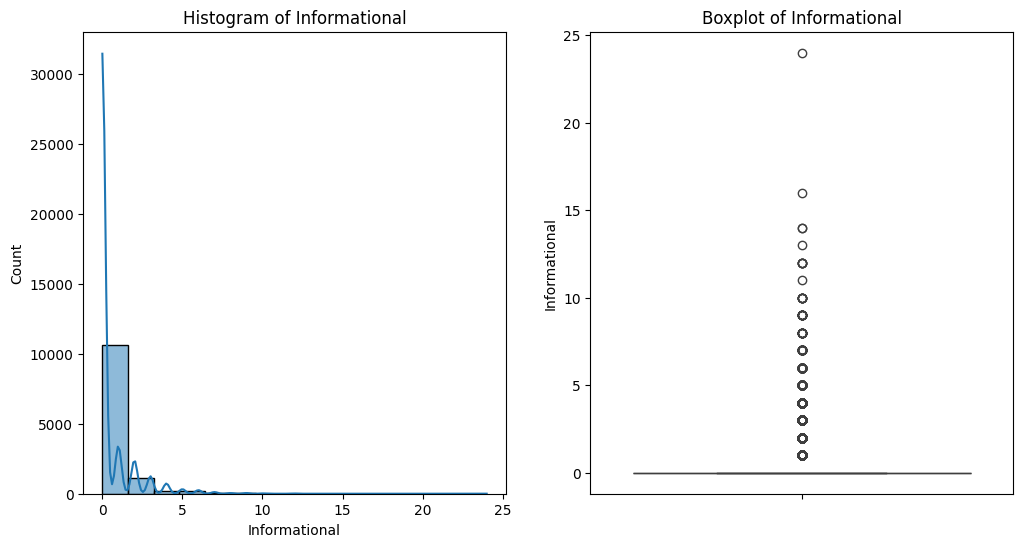

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x=df['Informational'], kde=True)
plt.title('Histogram of Informational')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Informational'])
plt.title('Boxplot of Informational')

plt.show()

In [21]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Informational_Duration'].quantile(0.25)
Q3 = df['Informational_Duration'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['Informational_Duration'] < lower_bound) | (df['Informational_Duration'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers",outlier_count)

Count the number of outliers 2405


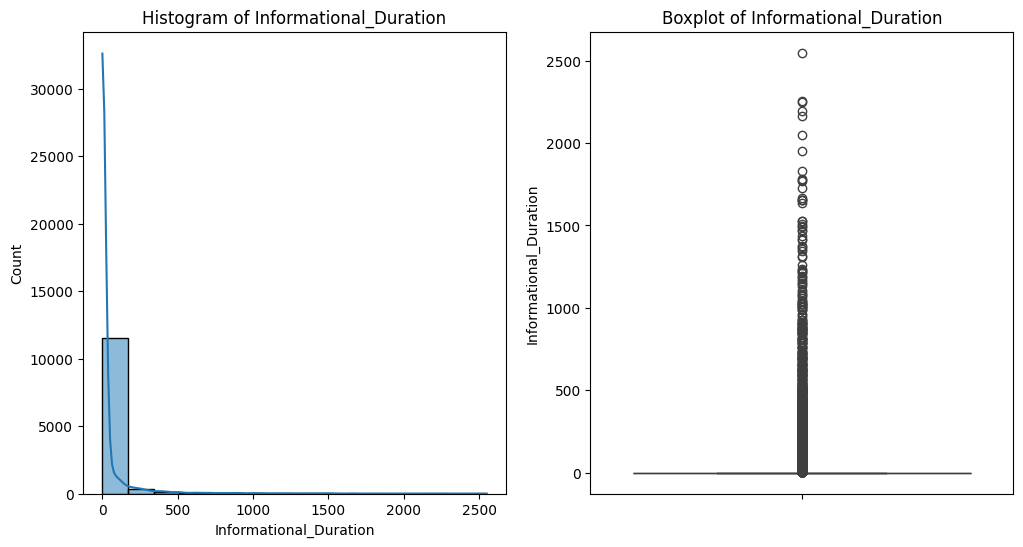

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x=df['Informational_Duration'], kde=True)
plt.title('Histogram of Informational_Duration')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Informational_Duration'])
plt.title('Boxplot of Informational_Duration')

plt.show()

In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ProductRelated'].quantile(0.25)
Q3 = df['ProductRelated'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['ProductRelated'] < lower_bound) | (df['ProductRelated'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers",outlier_count)

Count the number of outliers 1007


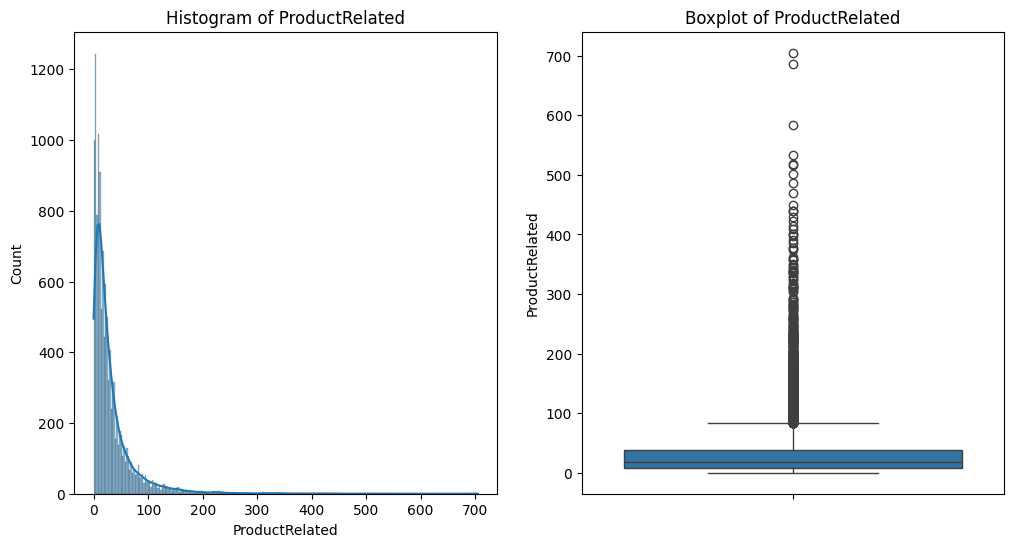

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x=df['ProductRelated'], kde=True)
plt.title('Histogram of ProductRelated')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['ProductRelated'])
plt.title('Boxplot of ProductRelated')

plt.show()

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ProductRelated_Duration'].quantile(0.25)
Q3 = df['ProductRelated_Duration'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['ProductRelated_Duration'] < lower_bound) | (df['ProductRelated_Duration'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers",outlier_count)

Count the number of outliers 951


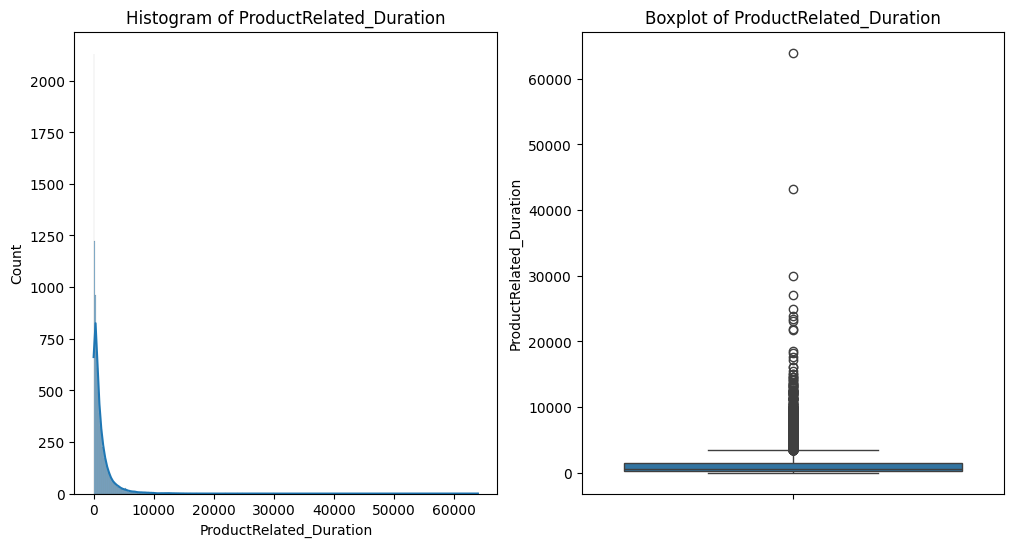

In [26]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x=df['ProductRelated_Duration'], kde=True)
plt.title('Histogram of ProductRelated_Duration')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['ProductRelated_Duration'])
plt.title('Boxplot of ProductRelated_Duration')

plt.show()

In [27]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['BounceRates'].quantile(0.25)
Q3 = df['BounceRates'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['BounceRates'] < lower_bound) | (df['BounceRates'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print(" Count the number of outliers",outlier_count)

 Count the number of outliers 1428


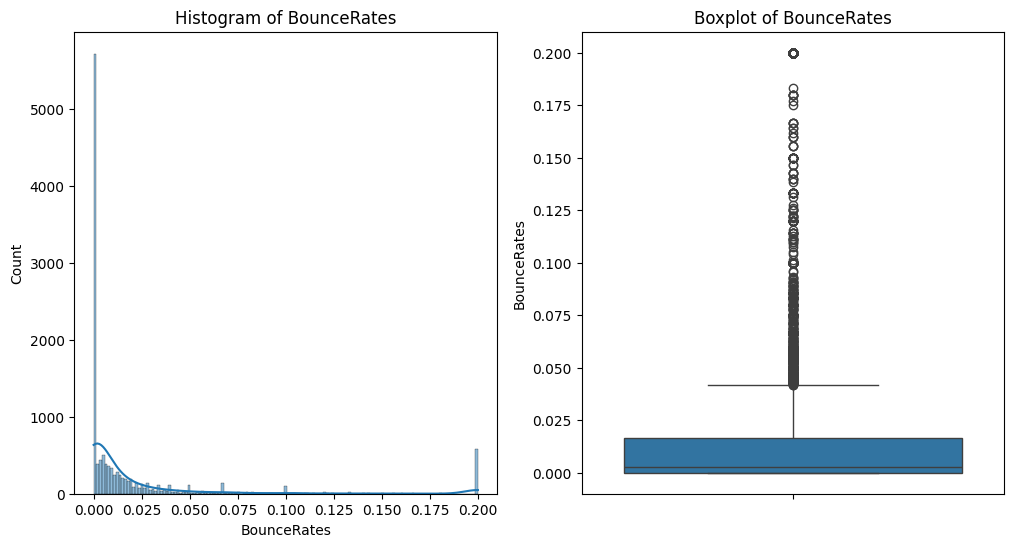

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x=df['BounceRates'], kde=True)
plt.title('Histogram of BounceRates')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['BounceRates'])
plt.title('Boxplot of BounceRates')

plt.show()

In [29]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ExitRates'].quantile(0.25)
Q3 = df['ExitRates'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['ExitRates'] < lower_bound) | (df['ExitRates'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print(outlier_count)

1325


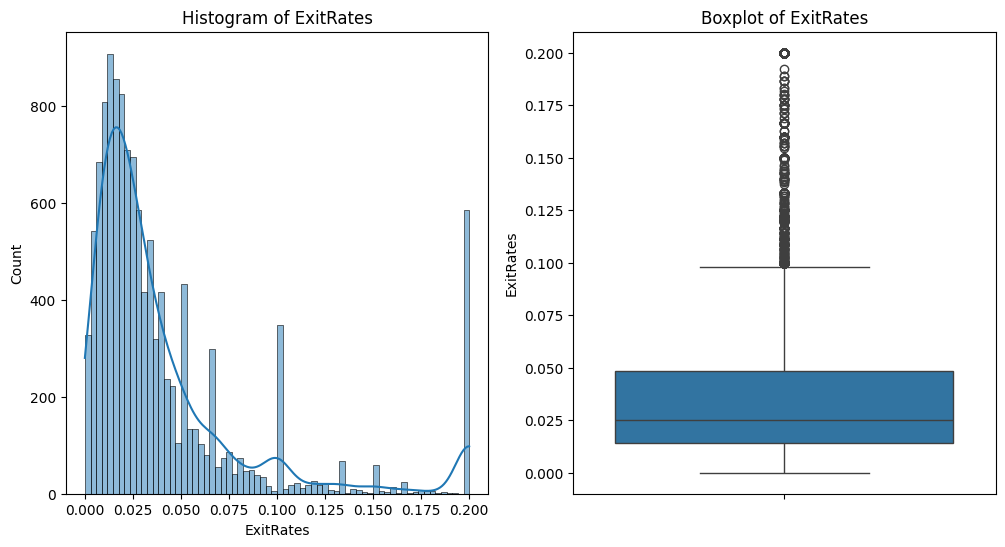

In [30]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x=df['ExitRates'], kde=True)
plt.title('Histogram of ExitRates')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['ExitRates'])
plt.title('Boxplot of ExitRates')

plt.show()

#Insights

1.The histogram of exit rates is skewed to the right (positively skewed), indicating that most sessions have relatively low exit rates. A large number of sessions have exit rates close to 0, with fewer sessions having higher exit rates.

2.Most of the data points are concentrated around lower exit rates (close to 0.025), as shown in both the histogram and the boxplot. This suggests that a majority of users tend to navigate the site without immediately exiting.

3.The few sessions with very high exit rates could be indicative of pages that are not performing well, possibly due to poor content, slow load times, or irrelevant information leading users to exit the site without further interaction.

In [31]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['PageValues'].quantile(0.25)
Q3 = df['PageValues'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['PageValues'] < lower_bound) | (df['PageValues'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers",outlier_count)

Count the number of outliers 2730


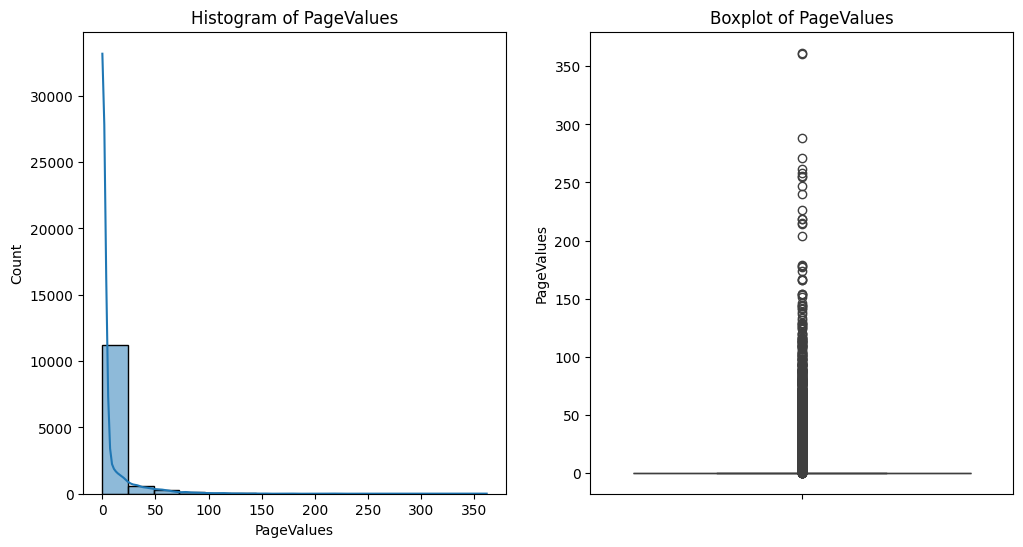

In [32]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x=df['PageValues'], kde=True)
plt.title('Histogram of PageValues')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['PageValues'])
plt.title('Boxplot of PageValues')

plt.show()

In [33]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['SpecialDay'].quantile(0.25)
Q3 = df['SpecialDay'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['SpecialDay'] < lower_bound) | (df['SpecialDay'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers",outlier_count)

Count the number of outliers 1249


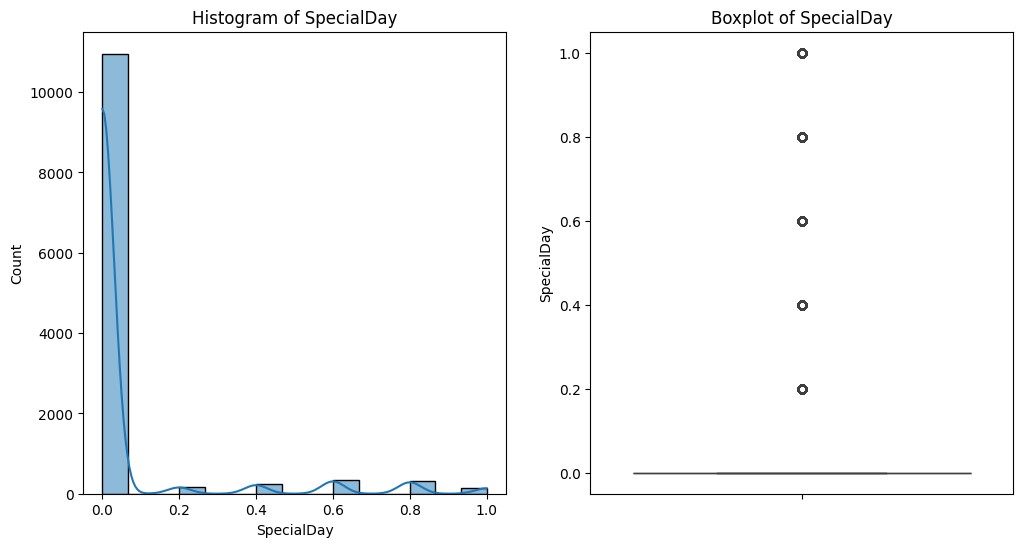

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x=df['SpecialDay'], kde=True)
plt.title('Histogram of SpecialDay')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['SpecialDay'])
plt.title('Boxplot of SpecialDay')

plt.show()

#Insights

1.The histogram of the "SpecialDay" variable is highly skewed, with most values concentrated at 0. This indicates that the majority of the data points correspond to non-special days.

2.The boxplot shows several distinct outliers where the "SpecialDay" value is above 0. These outliers could represent events such as holidays or specific promotional days where user behavior might be different.

3.Since special days are rare and represented as outliers, they could have a significant impact on any analysis related to user behavior, especially if the analysis is not accounting for these special days.



In [51]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Browser'].quantile(0.25)
Q3 = df['Browser'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df[(df['Browser'] < lower_bound) | (df['Browser'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers",outlier_count)

Count the number of outliers 4322


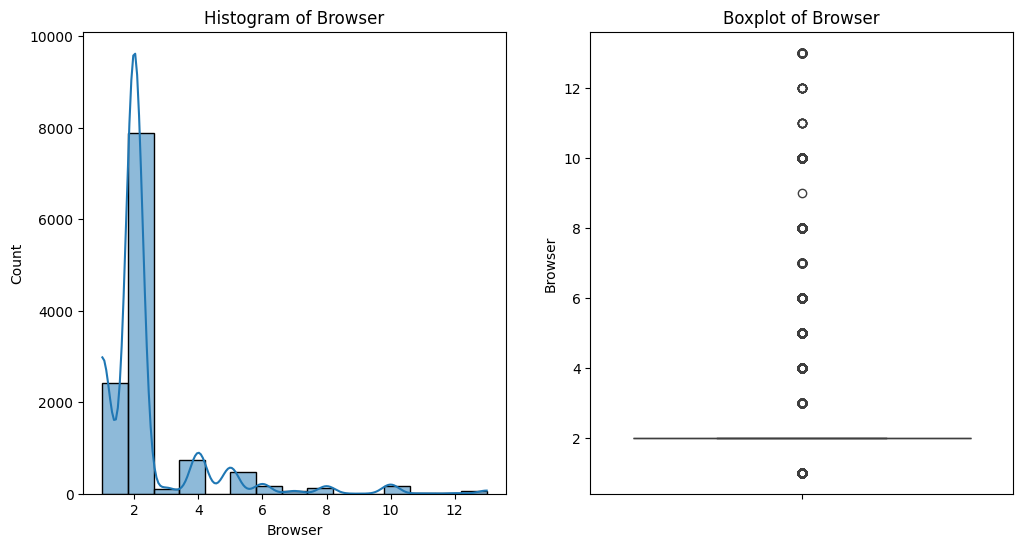

In [52]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x=df['Browser'], kde=True)
plt.title('Histogram of Browser')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Browser'])
plt.title('Boxplot of Browser')

plt.show()

#Class Distribution

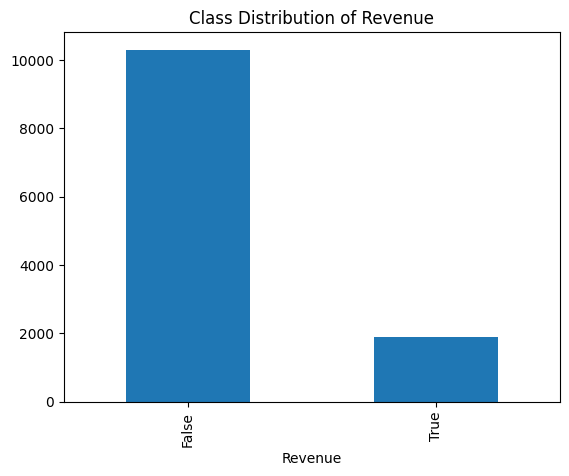

In [35]:
#Check the distribution of the target variable ('Revenue') to understand class balance
df['Revenue'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Revenue')
plt.show()

In [37]:
df['Revenue'].value_counts(normalize = True)*100

,proportion
Revenue,
False,84.367063
True,15.632937


The distribution of the Revenue variable shows that 84% of the instances do not generate revenue, while 16% do

#3. Correlation Analysis


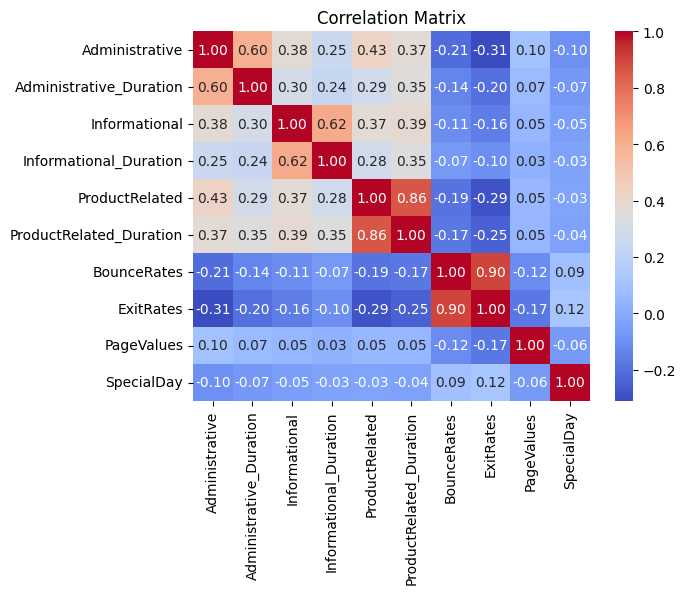

In [38]:
numerical_features = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "SpecialDay",
]

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt ='.2f')
plt.title("Correlation Matrix")
plt.show()

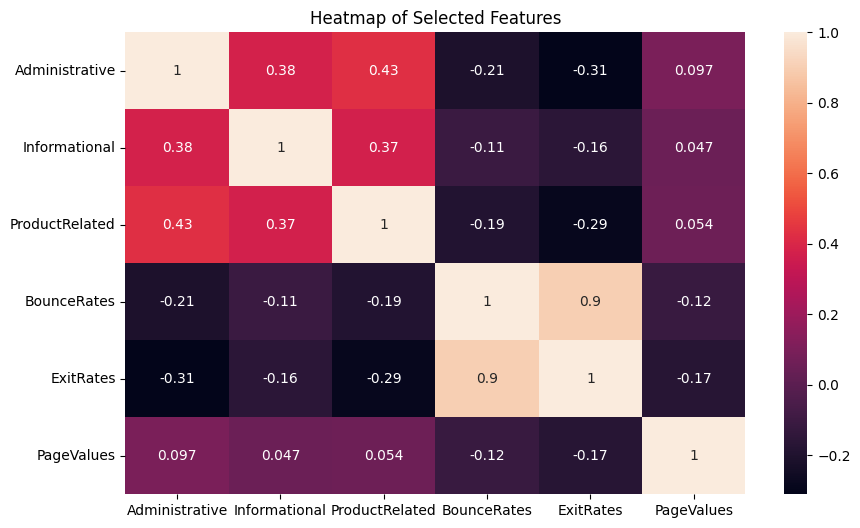

In [39]:
# Heatmap of selected numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Administrative', 'Informational', 'ProductRelated',
                         'BounceRates', 'ExitRates', 'PageValues']].corr(), annot=True)
plt.title('Heatmap of Selected Features')
plt.show()

#Insights:

1.Strong Positive Correlations:
ProductRelated and ProductRelated_Duration (0.86): There's a strong positive correlation between the number of product-related pages visited (ProductRelated) and the total time spent on these pages (ProductRelated_Duration). This suggests that users who visit more product-related pages also tend to spend more time on them, which is intuitive.

BounceRates and ExitRates (0.90): The high correlation between BounceRates and ExitRates indicates that pages with high bounce rates also tend to have high exit rates. This could imply that users who bounce from the site might also be leaving without engaging with other pages, possibly indicating poor page engagement or content relevance.

2.Moderate Positive Correlations:
Informational and Informational_Duration (0.62): A moderate positive correlation exists between the number of informational pages visited and the duration spent on these pages. Similar to the product-related pages, this suggests that users who are looking at more informational content also spend more time on it.

3.Negative Correlations:
BounceRates and ProductRelated (−0.19) and ExitRates and ProductRelated (−0.29): There are negative correlations between ProductRelated pages and both BounceRates and ExitRates. This might suggest that users who are more engaged with product-related content are less likely to bounce or exit, indicating that product pages might be more engaging or relevant to users.

BounceRates and SpecialDay (−0.09): A small negative correlation is seen between BounceRates and SpecialDay, which could suggest that on special days, users are slightly less likely to bounce. This might be due to special promotions or offers on these days that keep users engaged.

4.Low or No Correlations:
PageValues and most other variables: The variable PageValues shows very low correlations with other variables, indicating that the value assigned to a page doesn't strongly relate to other user behavior metrics in this dataset.

SpecialDay: The SpecialDay variable seems to have generally low correlations with other variables, indicating that the presence of a special day does not have a strong impact on most other user behaviors captured in this matrix.









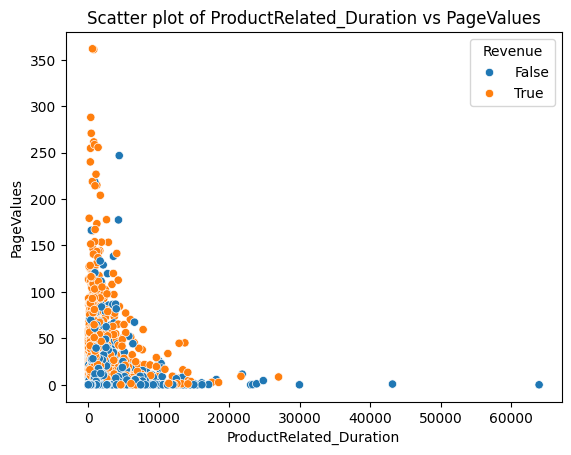

In [99]:
#Scatter plot for strong correlations
sns.scatterplot(x='ProductRelated_Duration', y='PageValues', hue='Revenue', data=df)
plt.title('Scatter plot of ProductRelated_Duration vs PageValues')
plt.show()

#Insight and recommendation:

This plot suggests that while time spent on product-related pages is important, the quality and value of the pages are more critical for generating revenue. Focusing on optimizing these high-value pages might be more effective than simply trying to increase time spent on product-related content.

#4. Page Category Analysis

In [40]:
page_categories = ["Administrative", "ProductRelated", "Informational"]
engagement_metrics = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration","ExitRates"]

segment_data = df[page_categories + engagement_metrics]
segment_data

,Administrative,ProductRelated,Informational,Administrative_Duration,Informational_Duration,ProductRelated_Duration,ExitRates
0,0,1,0,0.0,0.0,0.000000,0.200000
1,0,2,0,0.0,0.0,64.000000,0.100000
2,0,1,0,0.0,0.0,0.000000,0.200000
3,0,2,0,0.0,0.0,2.666667,0.140000
4,0,10,0,0.0,0.0,627.500000,0.050000
...,...,...,...,...,...,...,...
12325,3,53,0,145.0,0.0,1783.791667,0.029031
12326,0,5,0,0.0,0.0,465.750000,0.021333
12327,0,6,0,0.0,0.0,184.250000,0.086667
12328,4,15,0,75.0,0.0,346.000000,0.021053


In [41]:
for category in page_categories:
    # Select data for the current category
    category_data = segment_data[segment_data[category] > 0]

    # Summarize page views
    page_views = category_data[category].sum()

    # Summarize page durations
    avg_duration = category_data[f"{category}_Duration"].mean()

    # Summarize exit rates
    avg_exit_rate = category_data["ExitRates"].mean()

    # Print summary for the category
    print(f"\nSummary for Page Category: {category}")
    print(f"- Total Page Views: {page_views}")
    print(f"- Average Page Duration: {avg_duration:.2f} ")
    print(f"- Average Exit Rate: {avg_exit_rate:.2f}")


Summary for Page Category: Administrative
- Total Page Views: 28546
- Average Page Duration: 151.86 
- Average Exit Rate: 0.02

Summary for Page Category: ProductRelated
- Total Page Views: 391117
- Average Page Duration: 1210.75 
- Average Exit Rate: 0.04

Summary for Page Category: Informational
- Total Page Views: 6209
- Average Page Duration: 161.55 
- Average Exit Rate: 0.02


#Inights and recommendation

1.The high page views and long duration on ProductRelated pages underline their importance in user engagement and possibly in driving conversions. These pages are central to the user experience on your site. People spend on an average 20 mins on product related pages.

2.The low exit rates across all categories suggest a well-designed flow where users continue to engage with other content on the site rather than exiting. This is a positive indicator of user retention and site stickiness.

3.The Informational pages, despite having fewer views, still maintain a relatively high average duration, indicating that users who do access these pages are engaged, which could serve as a valuable step in the customer journey.

Focusing on optimizing ProductRelated pages could further enhance engagement and potentially improve conversion rates, while Informational pages could be leveraged to drive more traffic to product pages.


In [42]:
# Summarize Page Views
page_cnt_df = df.groupby('Revenue')[['Administrative', 'Informational', 'ProductRelated']].mean().reset_index()
page_cnt_df.loc[page_cnt_df['Revenue'] == True, 'Revenue'] = 'Buyers'
page_cnt_df.loc[page_cnt_df['Revenue'] == False, 'Revenue'] = 'Non-Buyers'

<ipython-input-42-51e1e4298c17>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Buyers' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  page_cnt_df.loc[page_cnt_df['Revenue'] == True, 'Revenue'] = 'Buyers'


In [43]:
page_cnt_df

,Revenue,Administrative,Informational,ProductRelated
0,Non-Buyers,2.143440,0.457318,29.050403
1,Buyers,3.393606,0.786164,48.210168


In [44]:
# Build df for duration count
page_dur_cnt = df.groupby('Revenue')[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].mean()

# change duration in sec to minutes
page_dur_cnt = page_dur_cnt.apply(lambda x : x/60).reset_index()

# Chage values of Revenue column to be more readable data
page_dur_cnt.loc[page_dur_cnt['Revenue'] == True, 'Revenue'] = 'Buyers'
page_dur_cnt.loc[page_dur_cnt['Revenue'] == False, 'Revenue'] = 'Non-Buyers'

page_dur_cnt

<ipython-input-44-53960826a6a1>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Buyers' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  page_dur_cnt.loc[page_dur_cnt['Revenue'] == True, 'Revenue'] = 'Buyers'


,Revenue,Administrative_Duration,Informational_Duration,ProductRelated_Duration
0,Non-Buyers,1.243921,0.510055,18.049615
1,Buyers,1.991387,0.960190,31.270160


#Insights:

1.Buyers generally spend more time on all types of pages compared to non-buyers, with the most significant difference observed in the time spent on product-related pages.

2.This suggests that the amount of time users engage with product-related content is a strong indicator of their likelihood to make a purchase.

3.The time spent on informational and administrative pages is also higher for buyers, but the differences are less pronounced compared to product-related content.


In [45]:
df["visited_all_categories"] = (
    (df["Administrative"] > 0) & (df["Informational"] > 0) & (df["ProductRelated"] > 0)
)


print(df.groupby("visited_all_categories")["Revenue"].mean())

visited_all_categories
False    0.137677
True     0.242732
Name: Revenue, dtype: float64


#Insights and recommendation:

1. Users who visit all three categories of pages (Administrative, Informational, and ProductRelated) are associated with a higher average revenue compared to those who do not visit all categories.

2. This suggests that users who explore all categories on the website are more likely to make a purchase or spend more, leading to higher revenue.

3. Encouraging users to engage with a variety of content on the site could potentially lead to higher conversions and revenue. This could be done through UX design strategies, personalized recommendations, or targeted content.

#7. User Segmentation

<ipython-input-19-c7f80d8e9a57>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Buyers' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  visitor_df.loc[visitor_df['Revenue']==True, 'Revenue']  = 'Buyers'


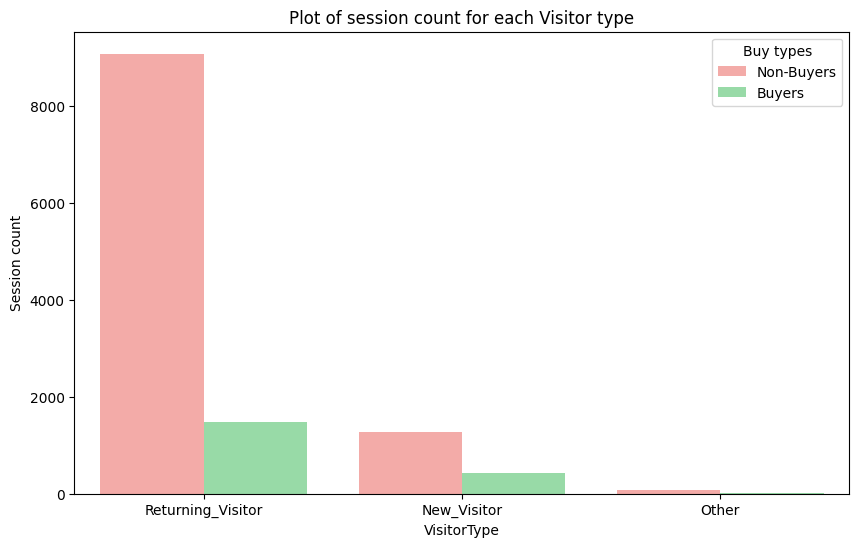

In [19]:
#Group df
visitor_df = df.groupby(['VisitorType', 'Revenue'])['Revenue'].size().reset_index(name='cnt').sort_values('cnt', ascending=False)

#Change name
visitor_df.loc[visitor_df['Revenue']==True, 'Revenue']  = 'Buyers'
visitor_df.loc[visitor_df['Revenue']==False, 'Revenue'] = 'Non-Buyers'

#Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel')[2:4][::-1]
sns.barplot(data=visitor_df,
            x='VisitorType',
            y='cnt',
            hue='Revenue',
            palette=colors)
plt.legend(title='Buy types')
plt.ylabel("Session count")
plt.title("Plot of session count for each Visitor type")
plt.show()

#Insights:
1.Returning visitors contribute the most to overall session counts, but a large proportion of them do not convert into buyers.

2.New visitors are less frequent but may have a better conversion rate given the more balanced distribution between buyers and non-buyers.

3.The "Other" category is not a significant contributor in terms of session count.

In [20]:
visitor_df

,VisitorType,Revenue,cnt
4,Returning_Visitor,Non-Buyers,9081
5,Returning_Visitor,Buyers,1470
0,New_Visitor,Non-Buyers,1272
1,New_Visitor,Buyers,422
2,Other,Non-Buyers,69
3,Other,Buyers,16


#Insights and recommendations:
Visitor Type Distribution:

1.Returning Visitors:

Non-Buyers: 9,081 sessions (86.07% of Returning Visitors).
Buyers: 1,470 sessions (13.93% of Returning Visitors).
A large majority of returning visitors do not convert into buyers. Despite their familiarity with the site or product, the conversion rate is relatively low. This indicates an opportunity to improve engagement or conversion strategies for this group.

2.New Visitors:

Non-Buyers: 1,272 sessions (75.09% of New Visitors).
Buyers: 422 sessions (24.91% of New Visitors).
New visitors have a higher conversion rate compared to returning visitors. About one-fourth of new visitors make a purchase, suggesting that the initial experience or promotion strategies may be effective in converting new users into buyers.

3.Other Visitors:

Non-Buyers: 69 sessions (81.18% of Other Visitors).
Buyers: 16 sessions (18.82% of Other Visitors).
The "Other" visitor category has the smallest number of sessions, both in terms of buyers and non-buyers. This category might represent a niche group or those who do not fit the typical visitor profiles, and their low conversion rate might indicate less relevance or engagement.



4.High Non-Buyer Rates: Across all visitor types, non-buyers significantly outnumber buyers. This highlights a need to focus on improving conversion rates, particularly for returning visitors who already have some level of interest or engagement.

5.New Visitor Conversion: The relatively higher conversion rate among new visitors suggests that first impressions or introductory offers may be working well. However, retaining these customers for future purchases could be an area for improvement.

6.Targeted Strategies: Understanding the reasons behind the high non-buyer rate, especially among returning visitors, could help in designing more effective marketing, user experience improvements, or personalized offers.

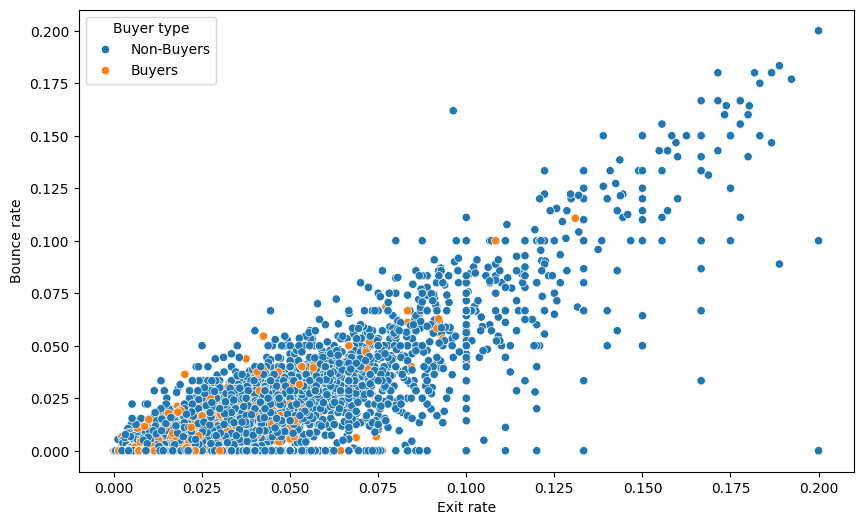

In [21]:
df_bounce_exit = df.copy()
df_bounce_exit['Revenue'] = df_bounce_exit['Revenue'].map({True: 'Buyers', False: 'Non-Buyers'})

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_bounce_exit, x='ExitRates', y='BounceRates', hue='Revenue')


plt.xlabel('Exit rate')
plt.ylabel('Bounce rate')
plt.legend(title='Buyer type')
plt.show()

#Insights and recommendations

1.Positive Correlation:

There is a clear positive correlation between bounce rate and exit rate, meaning that as the exit rate increases, the bounce rate also tends to increase. This is evident from the upward trend of the dots.

2.Non-Buyers Dominate:
The plot is overwhelmingly populated with blue dots (Non-Buyers), indicating that most of the sessions have not resulted in a purchase. Non-buyers are spread across a wide range of both bounce and exit rates.
Buyers' Distribution:

The orange dots (Buyers) are fewer and generally appear in clusters with lower to moderate bounce and exit rates. This suggests that buyers tend to have lower bounce and exit rates compared to non-buyers.

3.High Bounce and Exit Rates:
As bounce rate and exit rate increase, the density of both buyers and non-buyers decreases. However, buyers are particularly sparse in regions with high bounce and exit rates. This indicates that sessions with high bounce and exit rates are less likely to result in a purchase.

4.Low Bounce and Exit Rates:
Buyers are more likely to have low bounce and exit rates. This suggests that visitors who engage more with the content (low bounce rate) and continue to navigate through the site (low exit rate) are more likely to make a purchase.
Areas of Opportunity:

5.The presence of non-buyers in the low to moderate bounce and exit rate regions suggests that there is potential to convert these users into buyers. Identifying what differentiates these non-buyers from buyers in the same regions could reveal opportunities for improvement.


6.Focus on Reducing Bounce and Exit Rates: The data suggests that lower bounce and exit rates are associated with a higher likelihood of purchase. Therefore, strategies to reduce these rates (such as improving page content, load times, and navigation) may help increase conversion rates.

Target Non-Buyers in Favorable Zones: Since there are non-buyers in regions where bounce and exit rates are low, these users may be close to converting. Tailored strategies, such as personalized offers or better call-to-actions, might convert these visitors into buyers.

#TIME SERIES ANALYSIS

In [22]:
def annotate_plot(dataframe, column, color, ax):
    for i, point in dataframe.iterrows():
        ax.text(point['Month'], point[column], str(point[column]), color='grey', ha='center', va='bottom')

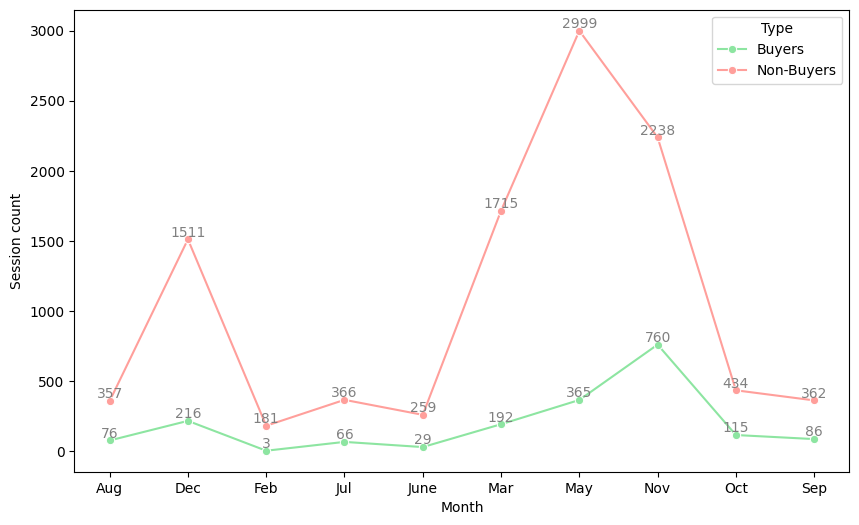

In [23]:
month_customer = df[df['Revenue']==True].groupby('Month')['Revenue'].agg(Buyers='count').reset_index()
month_customer['Non-Buyers']=df[df['Revenue']==False].groupby('Month')['Revenue'].agg('count').values


plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axis

# Plot and annotate for Buyers
buyers_color = sns.color_palette('pastel')[2]
sns.lineplot(data=month_customer, x='Month', y='Buyers', label='Buyers', color=buyers_color, marker='o', ax=ax)
annotate_plot(month_customer, 'Buyers', buyers_color, ax)

# Plot and annotate for Non-Buyers
non_buyers_color = sns.color_palette('pastel')[3]
sns.lineplot(data=month_customer, x='Month', y='Non-Buyers', label='Non-Buyers', color=non_buyers_color, marker='o', ax=ax)
annotate_plot(month_customer, 'Non-Buyers', non_buyers_color, ax)

plt.ylabel('Session count')
plt.legend(title="Type")
plt.show()

#Insights and recommendations
1.Peak Periods:

Non-buyers have two notable peaks: in May (2,999 sessions) and December (1,511 sessions).
Buyers also have peaks in November (760 sessions) and a smaller peak in December (216 sessions).

2.May and November Peaks:

May sees a significant spike in non-buyer sessions, reaching the highest point of the year (2,999 sessions). This could indicate an increased interest during this time, possibly due to seasonal trends, marketing campaigns, or events that attract more traffic but fail to convert them into buyers.
November shows the highest buyer activity, which might correlate with seasonal sales, promotions, or holiday shopping. This suggests that conversion strategies during this time are more effective, leading to higher buyer engagement.

3.Low Conversion Months:

February has the lowest buyer session count (3 sessions), indicating minimal conversions during this month. This might be due to post-holiday slumps or a lack of promotional activities.
Despite a lower session count overall, March and June show an uptick in buyer sessions relative to other low-activity months, hinting at potential opportunities for boosting sales.
December Insights:

4.December shows a significant spike for both non-buyers (1,511 sessions) and buyers (216 sessions). This suggests increased traffic due to holiday season promotions or year-end shopping trends. However, the conversion rate might need to be analyzed further to understand if the high non-buyer sessions could be converted into more purchases.
End of Year Trends:

5.The months of October and September see a noticeable drop in both buyer and non-buyer sessions after the peak in May. This could be a period where visitor interest wanes before picking up again towards the end of the year.

Conclusion:
6.Focus on Conversion during Peaks: The peaks in May and December for non-buyers indicate high traffic that does not convert well. There might be opportunities to optimize these periods for better conversion strategies, such as targeted promotions, enhanced user experience, or personalized marketing.

7.Boosting Off-Peak Months: The low activity in February, along with the slight increase in March and June, could benefit from focused marketing efforts to maintain momentum and encourage purchases during these quieter months.



In [24]:
weekend_df = df.groupby(['Weekend', 'Revenue']).size().reset_index(name='cnt')
weekend_df = weekend_df.pivot(index='Weekend', columns='Revenue', values='cnt')
# Rename the columns
weekend_df = weekend_df.rename(columns={True: 'Buyers', False: 'Non-Buyers'})
weekend_df.columns = [''.join(col).strip() for col in weekend_df.columns.values] #flattern column level

# Rename the index
weekend_df = weekend_df.rename(index={True: 'Week_end', False: 'Week_day'})

weekend_df['BuyersPct'] = weekend_df['Buyers'] / (weekend_df['Buyers'] + weekend_df['Non-Buyers']) * 100
weekend_df

,Non-Buyers,Buyers,BuyersPct
Weekend,,,
Week_day,8053,1409,14.891144
Week_end,2369,499,17.398884


#Insights and recommendation

1.Overall Purchase Behavior:The percentage of buyers (BuyersPct) is slightly higher during the weekend (17.4%) compared to the weekday (14.9%). This suggests that visitors during the weekend are marginally more likely to make purchases than those during the weekdays.

2.Traffic Comparison:Weekdays see a significantly higher number of non-buyers (8,053) compared to weekends (2,369). This could indicate that although more visitors browse during the weekdays, they are less likely to make purchases.

3.Sales Distribution:The total number of buyers is lower during both weekdays and weekends, but the weekend shows a slightly higher conversion rate. This implies that weekends might be a critical time for targeting potential buyers, despite the lower traffic.

4.Potential Actions: Weekend Promotions: Given the slightly higher conversion rate during weekends, it might be beneficial to focus marketing and promotional efforts on weekends to capitalize on the increased likelihood of purchases.

5.Weekday Engagement: With higher traffic but lower conversions during weekdays, strategies to engage visitors and convert them into buyers, such as personalized recommendations or limited-time offers, could be useful.
